# UCI Eats - Team One

In [1]:
#Created on Wed Sep 12 21:30:55 2018
#@author: Shyla Samuel,Janette Bennett,Brian Ahn, anthonyalvarez


---
### Referenced Material
 * https://stackoverflow.com/questions/45803676/python-pandas-loc-filter-for-list-of-values
 * https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
 * https://pandas.pydata.org/pandas-docs/stable/indexing.html    
 * https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/
 * https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
 * https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
 * https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
 * https://stackoverflow.com/questions/45247486/how-to-do-a-scatter-plot-with-different-edgecolor-in-matplotlib
 * https://stackoverflow.com/questions/311627/how-to-print-date-in-a-regular-format-in-python
 * from lessons Evr_Tweet_Breaker #01-Lessons/07-Social-Analytics/01-Getting-Twitter-Data/04-Evr_Break_Tweet_JSON/Solved/Evr_Tweet_Breaker.ipynb
 * from homework and articles s.o.f.
 * https://stackoverflow.com/questions/17518937/saving-a-json-file-to-computer-python
 * https://stackoverflow.com/questions/14114729/save-a-large-file-using-the-python-requests-library
 * https://github.com/Yelp/yelp-python
 * https://www.programiz.com/python-programming/methods/string/count
 * https://stackoverflow.com/questions/36252719/matplotlib-adjusting-the-ticks-to-fit-within-the-figure
 * https://stackoverflow.com/questions/32244019/how-to-rotate-x-axis-tick-labels-in-pandas-barplot
 * https://matplotlib.org/gallery/ticks_and_spines/ticklabels_rotation.html
 * https://stackoverflow.com/questions/24120023/strange-error-with-matplotlib-axes-labels
 * https://matplotlib.org/examples/text_labels_and_annotations/text_demo_fontdict.html
 * https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html
 * https://stackoverflow.com/questions/311627/how-to-print-date-in-a-regular-format-in-python
 * https://github.com/cjhutto/vaderSentiment
 * Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

---
## Data Sources

### Excel ![Data Sources Used](images/excelcsv_med.png "Excel Csv")

* [UCI Location Information](data/uciinfo.csv) UCI Location Information.
* [Businesses (Restaurants) Nearby](data/uci_yelp_businesses.csv) List of restaurants within 1 mile walking distance.
* [All Yelp Reviews for Businesses](data/uci_yelp_reviews_main.csv) List of yelp reviews for business max(3) per.
* [Merged Business and Reviews](data/uci_yelp_reviews_merged.csv) Combined set of data for each business and each review.
* [Yelp Sentiments](data/uci_yelp_sentiments.csv) Yelp review sentiments.

### JSON ![Data Sources Used](images/json-logo-med.png "JSON")
* [UCI location](data/00_uci_start_info.json) UCI Location lat/lon.
* [UCI Address](data/01_uci_address.json) UCI Addresss information.


## API Sources

#### Google Maps ![Data Sources Used](images/googledev.png "JSON")
* https://developers.google.com/

#### YELP! ![Data Sources Used](images/yelpdev.png "JSON")
* https://www.yelp.com/developers
    

---
### Data Visualizations

<a href="images/overall_review_sentiment_yelp.png" target="_blank">Overall Review Sentiment</a>
<img src="images/overall_review_sentiment_yelp.png" alt="Overall Review Sentiment" height="600" width="400">

---
<a href="images/rating_by_distance.png" target="_blank">Ratings by Distance</a>
<img src="images/rating_by_distance.png" alt="Ratings by Distance" height="600" width="400">

---
<a href="images/top_10_most_reviewed.png" target="_blank">Top 10 most reviewed restaurant</a>
<img src="images/top_10_most_reviewed.png" alt="Top 10 most reviewed restaurant" height="600" width="400">

---
<a href="images/Compound_By_Distance.png" target="_blank">Compound by distance</a>
<img src="images/Compound_By_Distance.png" alt="Compound by distance" height="600" width="400">

---
<a href="images/top_10_restaurants_by_distance.png" target="_blank">Top 10 by distance</a>
<img src="images/top_10_restaurants_by_distance.png" alt="Top 10 by distance" height="600" width="400">

---
<a href="images/map1.png" target="_blank">Locations within 1 mile of UCI</a>
<img src="images/map1.png" alt="Locations within 1 mile of UCI" height="600" width="400">

---
<a href="images/map2.png" target="_blank">Traffic terrain heatmap of relative distance</a>
<img src="images/map2.png" alt="Traffic terrain heatmap of relative distance" height="600" width="400">

---
<a href="images/map3.png" target="_blank">Satellite heatmap of relative distance</a>
<img src="images/map3.png" alt="Satellite heatmap of relative distance" height="600" width="400">


---
### Import Warnings

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

---
### Import Dependencies

In [3]:
%matplotlib notebook

# Dependencies
import json
import pprint
import requests
#import sys
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import gmaps


#api keys
from config_api import GEOCODE_API_KEY, YELP_API_KEY

#Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#time manipulations
from datetime import datetime, timedelta

gmaps.configure(api_key=GEOCODE_API_KEY)

---
### File Operations

In [4]:
#file operations
#get the dates for output files
title_date = datetime.now().strftime("%m/%d/%y")
file_date = datetime.now().strftime("%m%d%y")
#print(title_date)
#print(file_date)

---
### Functions

In [209]:
#functions
def load_json(jsonfile):
    """Load JSON from a file"""
    with open(jsonfile) as file_handle:
        return json.load(file_handle)
    
def milestometers(num_miles):
    #mtm = 1.609 * num_miles
    mtm = 1609.34 * num_miles
    mtm = int(mtm)
    return mtm

def meterstomiles(num_meters):
    mtm = num_meters / 1609.34
    mtm = round(mtm,2)
    return mtm

def getyelpreview(yelpid,API_KEY):
    review_url = f'https://api.yelp.com/v3/businesses/{yelpid}/reviews'
    review_headers = {'Authorization': 'Bearer {}'.format(API_KEY),}

    try:
        review_response = requests.get(review_url, headers=review_headers)
        review_responsetype = review_response.status_code
    
        review_data = review_response.json()
        
        #--testing--------->
        #print(response)
        #print(type(response.text))
        #print(response.text[:1000])
        #print(review_data)
        #<----end testing
        
        return review_data
    
    except:
        #print('EXCEPTION')
        return None

def getyelpbusiness(term,location,lat,lng,SEARCH_LIMIT,SEARCH_RADIUS,API_KEY):
    url = 'https://api.yelp.com/v3/businesses/search'

    headers = {
        'Authorization': 'Bearer {}'.format(API_KEY),
            }

    url_params = {
                'term': term.replace(' ', '+'),
                #'location': location.replace(' ', '+'),
                'latitude': lat,
                'longitude': lng,
                'radius': SEARCH_RADIUS,
                'limit': SEARCH_LIMIT
            }

    try:
        business_response = requests.get(url, headers=headers, params=url_params)
        business_data = business_response.json()
        
        #--testing--------->
        #print(response)
        #print(type(response.text))
        #print(response.text[:1000])
        #print(review_data)
        #<----end testing
        
        return business_data
    
    except:
        #print('EXCEPTION')
        return None
    


def makebar_chart(x_axis, y_axis ,chartname, imagename, x_title, y_title
            ,x_label_color="black", y_label_color="black", label_rotation="horizontal"
            ,font_family="sans-serif", font_size=10, fig_h=4, fig_l=4
            ,barcolors = ["red","green","lightblue","orange"]):

    #https://matplotlib.org/examples/text_labels_and_annotations/text_demo_fontdict.html
    font = {'family': font_family,
            'color':  'blue',
            'weight': 'bold',
            'size': font_size,
            }
    
    #set the sieze
    plt.figure(figsize=(fig_h,fig_l))
    plt.title(chartname)

    #add font style
    plt.xlabel(x_title, fontdict=font, color=x_label_color)
    plt.ylabel(y_title, fontdict=font, color=y_label_color)

    plt.bar(x_axis, y_axis, color=barcolors, align="center")
    plt.xticks(x_axis, x_axis, rotation=label_rotation)

    #set the counter to zero
    counter = 0
    for row in y_axis:
        num_perc=round(row,2)
        
        #need to change the y value else all labels are on horizontal zero line
        if num_perc < 0:
            ycolor = 'red'
        
            
        
        #xloc = com_row + 0.0075
        xloc = counter
        yloc = num_perc + 0.0075
        ycolor = 'black'
        plt.text(xloc, yloc, num_perc, ha='center', color=ycolor)
    
        #increment counter
        counter += 1

    plt.tight_layout()
    plt.grid()

    #save the plot
    plt.savefig("images/" + imagename)
    plt.show()

    #---------------->
    

def makebar(x_axis, y_axis ,chartname, imagename, x_title, y_title
            ,x_label_color="black", y_label_color="black", label_rotation="horizontal"
            ,font_family="sans-serif", font_size=10, fig_h=4, fig_l=4
            ,barcolors = ["purple","green","lightblue","orange"]):

    #https://matplotlib.org/examples/text_labels_and_annotations/text_demo_fontdict.html
    font = {'family': font_family,
            'color':  'blue',
            'weight': 'bold',
            'size': font_size,
            }
    
    #find the proper color based on percent value
    #percentagecolors = []
    #for value in percenttumor['PercentChange']:
    #    #print(value)
    #    if value < 0:
    #        percentagecolors.append('blue')
    #    else:
    #        percentagecolors.append('red')
        
    #now change into list comprehension
    #https://stackoverflow.com/questions/4406389/if-else-in-a-list-comprehension
    percentagecolors = [ 'blue' if perc <0 else 'red' for perc in y_axis]
    
    
    #set the sieze
    plt.figure(figsize=(fig_h,fig_l))
    plt.title(chartname)

    #add font style
    plt.xlabel(x_title, fontdict=font, color=x_label_color)
    plt.ylabel(y_title, fontdict=font, color=y_label_color)

    plt.bar(x_axis, y_axis, color=barcolors, align="center")
    plt.xticks(x_axis, x_axis, rotation=label_rotation)
    
    plt.axhline(y=0, color = 'blue')
    
    #set the counter to zero
    counter = 0
    for row in y_axis:
        num_perc=round(row,2)   
        
        #xloc = com_row + 0.0075
        xloc = counter
        
        #deal with negative values on the label so they line up properly
        #yloc = num_perc + 0.0075
        if num_perc < 0:
            yloc = num_perc - 0.025
            #+ 0.0075
        else:
            yloc = num_perc + 0.01
        
        
        ycolor = 'black'
        plt.text(xloc, yloc, num_perc, ha='center', color=ycolor)
    
        #increment counter
        counter += 1

    plt.tight_layout()
    plt.grid()

    #save the plot
    plt.savefig("images/" + imagename)
    plt.show()

    #---------------->

def scatterbyvalue(distance1, review1, count1, distance2, review2, count2, distance3, review3, count3
                  ,xlabel,ylabel,maptitle,legendtitle,imagename):
    plt.figure(figsize=(8,6))
    plt.scatter(distance1, review1, color = "blue", edgecolors="black", s = count1 *10, 
                label = "1", alpha = 0.5, linewidth = 1.5)
    plt.scatter(distance2, review2, color = "yellow", edgecolors="black", s = count2*10, 
                label = "2", alpha = 0.5, linewidth = 1.5)
    plt.scatter(distance3, review3, color = "red", edgecolors="black", s = count3*10, 
                label = "3", alpha = 0.5, linewidth = 1.5)
    
    plt.xlabel(xlabel, color="red")
    plt.ylabel(ylabel, color="blue")
    plt.title(maptitle)
    bubble_lgnd = plt.legend(title = legendtitle, loc="best")
    bubble_lgnd.legendHandles[0]._sizes=[25]
    bubble_lgnd.legendHandles[1]._sizes=[25]
    bubble_lgnd.legendHandles[2]._sizes=[25]
    plt.grid(True)
    plt.savefig("images/" + imagename)
    plt.show()



## Functional Logic

---
### Google API Definitions

##### get latitude/longitude information by location name

In [6]:
#get coordinates by location name
origin_city = "Irvine,California"

#replacing spaces for HTML Encoding?
origin_city = origin_city.replace(" ","%20")

base_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"
location_name = "University of California Irvine"
input_name = location_name.replace(" ","%20")

input_url = "input=" + input_name
input_fields = "&inputtype=textquery&fields=photos,formatted_address,name,rating,opening_hours,geometry"
key_info = "&key="
target_url = f"{base_url}{input_url}{input_fields}{key_info}{GEOCODE_API_KEY}"


---
##### Run a request to endpoint and convert result to json

In [7]:
# Run a request to endpoint and convert result to json
uci_start_info = requests.get(target_url).json()

# Print the json
print(uci_start_info)

{'candidates': [{'formatted_address': 'Irvine, CA 92697, USA', 'geometry': {'location': {'lat': 33.6404952, 'lng': -117.8442962}, 'viewport': {'northeast': {'lat': 33.66208720000001, 'lng': -117.81300975}, 'southwest': {'lat': 33.625382, 'lng': -117.86935515}}}, 'name': 'University of California Irvine', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/103012318601018077697/photos">Sy Guo</a>'], 'photo_reference': 'CmRaAAAAO9S0A5_oozTR1C7wWhsa6hXuwrB1ltqQfxcDt7uKfndmB8sRejt_Jn7Whi4etFIIjBX5b7lp0QTYAJZVyruyg86DL8DWV27KvI8toMctVmKldS-Lv27GmGuBxpu5dFe_EhBja7m2sTsd4rsH17NlQ8yZGhQ29DROBF6H9MIOSm7jlPQ_NSRj1Q', 'width': 4032}], 'rating': 4.2}], 'debug_log': {'line': []}, 'status': 'OK'}


---
#### start saving files in case we hit the max limit error


In [8]:
#save json data
file_path = "data/"
file_name = "00_uci_start_latlon.json"
file_save = file_path + file_name

#from homework and articles s.o.f.
#https://stackoverflow.com/questions/17518937/saving-a-json-file-to-computer-python
#https://stackoverflow.com/questions/14114729/save-a-large-file-using-the-python-requests-library

#saving the file in case i get blocked due to over limit warnings again
with open(file_save, "w") as f:
    json.dump(uci_start_info, f)


---
###### pretty print to view data definition

In [9]:
#print out json file
print(json.dumps(uci_start_info, indent=4, sort_keys=True))

{
    "candidates": [
        {
            "formatted_address": "Irvine, CA 92697, USA",
            "geometry": {
                "location": {
                    "lat": 33.6404952,
                    "lng": -117.8442962
                },
                "viewport": {
                    "northeast": {
                        "lat": 33.66208720000001,
                        "lng": -117.81300975
                    },
                    "southwest": {
                        "lat": 33.625382,
                        "lng": -117.86935515
                    }
                }
            },
            "name": "University of California Irvine",
            "photos": [
                {
                    "height": 3024,
                    "html_attributions": [
                        "<a href=\"https://maps.google.com/maps/contrib/103012318601018077697/photos\">Sy Guo</a>"
                    ],
                    "photo_reference": "CmRaAAAAO9S0A5_oozTR1C7wWhsa6hXuwrB1ltqQfx

---
##### grab the address information

In [10]:
#get important information
location_info = uci_start_info["candidates"]
location_info

[{'formatted_address': 'Irvine, CA 92697, USA',
  'geometry': {'location': {'lat': 33.6404952, 'lng': -117.8442962},
   'viewport': {'northeast': {'lat': 33.66208720000001, 'lng': -117.81300975},
    'southwest': {'lat': 33.625382, 'lng': -117.86935515}}},
  'name': 'University of California Irvine',
  'photos': [{'height': 3024,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/103012318601018077697/photos">Sy Guo</a>'],
    'photo_reference': 'CmRaAAAAO9S0A5_oozTR1C7wWhsa6hXuwrB1ltqQfxcDt7uKfndmB8sRejt_Jn7Whi4etFIIjBX5b7lp0QTYAJZVyruyg86DL8DWV27KvI8toMctVmKldS-Lv27GmGuBxpu5dFe_EhBja7m2sTsd4rsH17NlQ8yZGhQ29DROBF6H9MIOSm7jlPQ_NSRj1Q',
    'width': 4032}],
  'rating': 4.2}]

---
##### set variables to holde lat/lon information

In [11]:
uci_coords = location_info[0]["geometry"]["location"]
#uci_coords

uci_lat = uci_coords["lat"]
uci_lng = uci_coords["lng"]

print(f"{uci_coords}")

print(f'LAT: {uci_lat} - LNG: {uci_lng}')

{'lat': 33.6404952, 'lng': -117.8442962}
LAT: 33.6404952 - LNG: -117.8442962


---
##### reverse Geocode for accurate address

In [12]:
#Reverse Geocode for accurate address
#https://maps.googleapis.com/maps/api/geocode/json?latlng=33.6404952,-117.8442962&key=
addr_url = f"https://maps.googleapis.com/maps/api/geocode/json?latlng={uci_lat},{uci_lng}&key={GEOCODE_API_KEY}"
#print(addr_url)

In [13]:
#Run a request to endpoint and convert result to json
uci_addr_info = requests.get(addr_url).json()

# Print the json
#print(uci_addr_info)

In [14]:
#print out json file
print(json.dumps(uci_addr_info, indent=4, sort_keys=True))

{
    "plus_code": {
        "compound_code": "J5R4+57 Irvine, CA, USA",
        "global_code": "8554J5R4+57"
    },
    "results": [
        {
            "address_components": [
                {
                    "long_name": "10",
                    "short_name": "10",
                    "types": [
                        "street_number"
                    ]
                },
                {
                    "long_name": "Curie Court",
                    "short_name": "Curie Ct",
                    "types": [
                        "route"
                    ]
                },
                {
                    "long_name": "Irvine",
                    "short_name": "Irvine",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "Orange County",
                    "short_name": "Orange County",
                    "types"

In [15]:
#save json data
file_name1 = "01_uci_reverse_geocode.json"
file_save1 = file_path + file_name1

#saving the file in case i get blocked due to over limit warnings again
with open(file_save1, "w") as f:
    json.dump(uci_addr_info, f)

In [16]:
uci_address = uci_addr_info["results"][0]["formatted_address"]

---
### UCI Lat Lng dataframe

##### create a dataframe to hold location information

In [17]:
#create a dataframe to hold location information
uci_address_df = pd.DataFrame({"Location Name" : location_name
                              ,"Address" : uci_address
                              ,"lat" : uci_lat
                              ,"lng" : uci_lng
                              }, index=[0])

uci_address_df

,Location Name,Address,lat,lng
0,University of California Irvine,"10 Curie Ct, Irvine, CA 92617, USA",33.640495,-117.844296


---
##### save the dataframe to csv

In [18]:
#save the dataframe
uci_address_df.to_csv(file_path + "uciinfo.csv", header=True)

In [19]:
#store results in variables 
ulat = uci_address_df['lat']
ulng = uci_address_df['lng']
uname = uci_address_df['Location Name']
uaddress = uci_address_df['Address']

#define some business search variables
bus_term = 'Restaurants'
bus_location = 'Irvine, California'
bus_limit = 50
#set the search radius equal to 2 miles around the location
bus_radius = milestometers(1)


---
##### grab all the yelp info with the above requirements

In [20]:
#get yelp business info with above requirements
yelp_info = getyelpbusiness(bus_term,bus_location,ulat,ulng,bus_limit,bus_radius,YELP_API_KEY)

In [21]:
print(json.dumps(yelp_info, indent=4, sort_keys=True))

{
    "businesses": [
        {
            "alias": "slapfish-irvine",
            "categories": [
                {
                    "alias": "seafood",
                    "title": "Seafood"
                },
                {
                    "alias": "fishnchips",
                    "title": "Fish & Chips"
                },
                {
                    "alias": "sandwiches",
                    "title": "Sandwiches"
                }
            ],
            "coordinates": {
                "latitude": 33.64981,
                "longitude": -117.83878
            },
            "display_phone": "(949) 748-1174",
            "distance": 1166.3965035873593,
            "id": "TJljvcQrbgaHyrWRTJDSJA",
            "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/QQ-qv-7idy5fMiErpGoITQ/o.jpg",
            "is_closed": false,
            "location": {
                "address1": "4249 Campus Dr",
                "address2": "",
                "address3": "B148"

In [22]:
#save json data
file_name2 = "02_uci_restaurants.json"
file_save2 = file_path + file_name2

#saving the file in case i get blocked due to over limit warnings again
with open(file_save2, "w") as f:
    json.dump(yelp_info, f)

---
##### view the main parts of the api get call

In [23]:

for x in yelp_info:
    print(x)
    
#from this we only want to know the details from the [businesses] item

businesses
total
region


---
### YELP API Definitions

---
##### pull the data from the yelp api business call and build a list containing a dictionary object

In [24]:

restaurants = []
rest_info = {}

for restaurant in yelp_info["businesses"]:
    #print(restaurant["name"])
    
    #rest_type = restaurant["categories"][0]
    #rest_subtype = restaurant["categories"]
    
    #print(f'{rest_name} - {rest_type} - {rest_subtype}')   
    #print(f'{rest_subtype[0]}')   
    
    rest_name = restaurant["name"]
    
    #account for the number of possible categories, we only want a max of 2
    numlen = len(restaurant["categories"])
    #print(numlen)
    if numlen <1:
        rest_type = "n/a"
        rest_subtype = "n/a"
    elif numlen == 1:
        rest_type = restaurant["categories"][0]["title"]
        rest_subtype = "n/a"
    elif numlen > 1:
        rest_type = restaurant["categories"][0]["title"]
        rest_subtype = restaurant["categories"][1]["title"]
    else:
        rest_type = "n/a"
        rest_subtype = "n/a"
    
    rest_lat = restaurant["coordinates"]["latitude"]
    rest_lng = restaurant["coordinates"]["longitude"]
    
    rest_distance = restaurant["distance"]   
    #make sure its not zero
    #save meters and miles
    if rest_distance != None or rest_distance ==0:
        rest_distance_meters = int(rest_distance)
        rest_distance_miles = meterstomiles(rest_distance)

    else:
        rest_distance_meters = 0
        rest_distance_miles = 0
     
    rest_id = restaurant["id"]
    rest_addr1 = restaurant["location"]["address1"]
    rest_addr2 = restaurant["location"]["address2"]
    rest_city = restaurant["location"]["city"]
    rest_country = restaurant["location"]["country"]
    rest_state = restaurant["location"]["state"]
    rest_zip = restaurant["location"]["zip_code"]
    
    #rest_price = restaurant["price"]
    try:
        rest_price = restaurant["price"]
        rest_price_value = rest_price.count("$")
        #count = string.count(substring)
        #print(rest_price)
        
    except:
        #print('NO $')
        rest_price = 'NO $'
        rest_price_value = 0
    
    rest_rating = restaurant["rating"]
    rest_review = restaurant["review_count"]
    
    rest_info = {"yelpid":rest_id
                ,"name":rest_name
                ,"lat":rest_lat
                ,"lng":rest_lng
                ,"distance meters": rest_distance_meters
                ,"distance miles": rest_distance_miles
                ,"address1":rest_addr1
                ,"address2":rest_addr2
                ,"city":rest_city
                ,"state":rest_state
                ,"zip":rest_zip
                ,"price rating": rest_price
                ,"price value" : rest_price_value
                ,"review rating":rest_rating
                ,"review count": rest_review
                ,"type":rest_type
                ,"sub type":rest_subtype
                }
    restaurants.append(rest_info)
    
    #print(rest_addr1)
    #print(restaurant["location"])
    #print(rest_type)
    #rest_subtype

---
#####  Building the main dataframes
* build the dataframe 
* filter only the results for 1 mile due to our conversion formula might return results that are slightly higher due to the rounding/integer conversion
* reorder the columns
* verify the columns
* save to csv

In [25]:
#build the dataframe 
restaurant_df = pd.DataFrame(restaurants)

In [26]:
#filter only the results for 1 mile due to our conversion formula might return results that
#are slightly higher due to the rounding/integer conversion
restaurant_df = restaurant_df.loc[restaurant_df["distance miles"]<=1]

In [27]:
#reorder the columns
restaurant_df = restaurant_df[['yelpid','name','lat','lng','distance miles','distance meters'
                               ,'price rating','price value','review count', 'review rating'
                              ,'type','sub type','address1','city','state','zip']]
#.set_index('id',[0])
restaurant_df = restaurant_df.reset_index()
restaurant_df.head(3)


,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,0,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,630,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
1,1,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839279,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
2,2,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,286,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612


In [28]:
#get a count of the restaurants with 1 mile that fit our criteria
print(len(restaurant_df["index"]))

47


In [29]:
#check the columns
restaurant_df.columns

Index(['index', 'yelpid', 'name', 'lat', 'lng', 'distance miles',
       'distance meters', 'price rating', 'price value', 'review count',
       'review rating', 'type', 'sub type', 'address1', 'city', 'state',
       'zip'],
      dtype='object')

In [30]:
#output the sentiments to csv
restaurant_df.to_csv(file_path + "uci_yelp_businesses.csv", header=True)

##### Begin VADER sentiment analysis

In [31]:
#set a variable to loop through the businesses by id
#yelpid_data = restaurant_df["yelpid"]
#print(yelpid_data)

#setup some variables for the reviews
yelp_reviews = []
reviews_info = {}

In [32]:
#-----VADER-->
vader_results = []
#<----END VADER


for index, row in restaurant_df.iterrows():
        
    #-----VADER-->
    com_ls = []
    pos_ls = []
    neg_ls = []
    neu_ls = []
    #<----END VADER
    
    #iterate through df
    
    #get the id
    yid = row[1]
    #print(f'{index}: {yid}')
    #restaurant name
    yname = row[2]
    
    #call our yelpfunc and sleep it for 2 seconds
    yreview = getyelpreview(yid,YELP_API_KEY)
    #print(yreview)
    #time.sleep(2)
    
    for review in yreview["reviews"]:
        
        #the restaurant id we will be using to join on later
        rest_id = yid
        
        ls_review_id = review["id"]
        ls_review_rating = review["rating"]
        ls_review_text = review["text"]
        ls_review_timestamp = review["time_created"]
        
        #add yelp review name and review id
        ls_review_name = review["user"]["name"]
        ls_review_reviewerid = review["user"]["id"]
        
        
        #check to see if we have text to parse
        #print(ls_review_text)
        
        #--->VADER
        
        #run vader analysis on each text
        results = analyzer.polarity_scores(ls_review_text)
        com = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]
       
        #add each value to each list
        com_ls.append(com)
        pos_ls.append(pos)
        neg_ls.append(neg)
        neu_ls.append(neu)
        #--------END VADER
        

        reviews_info = {"yelpid":rest_id
                        ,"reviewid": ls_review_id
                        ,"review text": ls_review_text
                        ,"timestamp": ls_review_timestamp
                        ,"reviewer name": ls_review_name
                        ,"reviewer id": ls_review_reviewerid
                        ,"compound" : com
                        ,"positive" : pos
                        ,"negative" : neg
                        ,"neutral" : neu
                       }
        yelp_reviews.append(reviews_info)
        
    #sentiment results
    user_results = {"Restaurant": yname
                    ,"Compound Score": np.mean(com_ls)
                    ,"Postive Score": np.mean(pos_ls)
                    ,"Negative Score": np.mean(neg_ls)
                    ,"Neutral Score": np.mean(neu_ls)
                   }
    vader_results.append(user_results)
        
print(f'Compound: {com_ls} or {com}')


Compound: [0.7178, -0.1645, -0.5372] or -0.5372


##### view results and save to csv

In [33]:
#view the vader results
#print(vader_results)

#create a sentiment dataframe
sentiments_pd = pd.DataFrame.from_dict(vader_results)
sentiments_pd.head()

,Compound Score,Negative Score,Neutral Score,Postive Score,Restaurant
0,0.206333,0.025000,0.862333,0.112667,Slapfish
1,0.725333,0.000000,0.797000,0.203000,Le Diplomate Cafe
2,0.173267,0.109333,0.746000,0.144667,Asian Box
3,0.531633,0.047000,0.735000,0.218333,Mendocino Farms
4,0.408433,0.044667,0.816333,0.139000,Hen House Grill


In [36]:
#output the sentiments to csv
sentiments_pd.to_csv(file_path + "uci_yelp_sentiments.csv", header=True)

In [35]:
#clear the results for testing
#reviews_df = None
#yelp_reviews = None
#yelp_reviews

##### build main and compound dataframes to merge and save to csv

In [37]:
#build the dataframe and reorder the columns
reviews_df = pd.DataFrame(yelp_reviews)
reviews_df.head(5)

,compound,negative,neutral,positive,review text,reviewer id,reviewer name,reviewid,timestamp,yelpid
0,0.8945,0.000,0.662,0.338,Slapfish has really delicious food. You can't ...,JqEyA208ve_EkgDXXli6kw,Zaina H.,S4YUqarOrAgmVomHxxsaDA,2018-09-05 09:25:23,TJljvcQrbgaHyrWRTJDSJA
1,-0.2755,0.075,0.925,0.000,This review is ONLY for their famous Lobster B...,TO8tfo5XWZdA5QnMFhlHzw,Stevey R.,x5CPgsXrIRbVXeRRku46sw,2018-09-06 12:48:45,TJljvcQrbgaHyrWRTJDSJA
2,0.0000,0.000,1.000,0.000,Craving lobster roll on a random week day nigh...,tvSPQmR5bhvVKm9RJnpkag,Pauline T.,5sLN-7RumIiKaEj-g6M3MA,2018-09-02 21:21:51,TJljvcQrbgaHyrWRTJDSJA
3,0.8122,0.000,0.779,0.221,One of the best sandwich places when I went to...,QbMlALsQpgvOpzBB2DieOQ,Cathy L.,kvzw_gmI46tTIVMgR0jVPA,2018-08-20 19:51:03,QzJxZ67PVrqy6Z_5gKfxyw
4,0.6369,0.000,0.822,0.178,This place has been around forever and it's st...,hGFGvI-jVxNB2xwZY6KrjQ,Alice L.,CEVFhf2fqRamU_5BkM3zCQ,2018-09-16 16:45:25,QzJxZ67PVrqy6Z_5gKfxyw


In [38]:
#view column info
reviews_df.columns

Index(['compound', 'negative', 'neutral', 'positive', 'review text',
       'reviewer id', 'reviewer name', 'reviewid', 'timestamp', 'yelpid'],
      dtype='object')

In [39]:
reviews_df = reviews_df[['yelpid','reviewid','compound','positive','negative','neutral','review text','timestamp','reviewer name','reviewer id']]
reviews_df = reviews_df.reset_index()
reviews_df.head(3)

,index,yelpid,reviewid,compound,positive,negative,neutral,review text,timestamp,reviewer name,reviewer id
0,0,TJljvcQrbgaHyrWRTJDSJA,S4YUqarOrAgmVomHxxsaDA,0.8945,0.338,0.000,0.662,Slapfish has really delicious food. You can't ...,2018-09-05 09:25:23,Zaina H.,JqEyA208ve_EkgDXXli6kw
1,1,TJljvcQrbgaHyrWRTJDSJA,x5CPgsXrIRbVXeRRku46sw,-0.2755,0.000,0.075,0.925,This review is ONLY for their famous Lobster B...,2018-09-06 12:48:45,Stevey R.,TO8tfo5XWZdA5QnMFhlHzw
2,2,TJljvcQrbgaHyrWRTJDSJA,5sLN-7RumIiKaEj-g6M3MA,0.0000,0.000,0.000,1.000,Craving lobster roll on a random week day nigh...,2018-09-02 21:21:51,Pauline T.,tvSPQmR5bhvVKm9RJnpkag


In [40]:
#save df
reviews_df.to_csv(file_path + "uci_yelp_reviews_main.csv", header=True)

In [41]:
#merge both dataframes
#https://stackoverflow.com/questions/18792918/combine-two-pandas-data-frames-join-on-a-common-column
#pd.merge(restaurant_ids_dataframe, restaurant_review_frame, on='business_id', how='outer')
#pd.merge(restaurant_ids_dataframe, restaurant_review_frame, on='business_id', how='outer', suffixes=('_restaurant_id', '_restaurant_review'))

reviews_merged_df = pd.merge(restaurant_df, reviews_df, on='yelpid', how="outer")

#removing merged indexes
del reviews_merged_df["index_x"]
del reviews_merged_df["index_y"]

#setting the df to our cleaned df
reviews_merged_df = reviews_merged_df

#resetting the index
reviews_merged_df = reviews_merged_df.reset_index(drop=True)

reviews_merged_df.head(1)
#new_df = None

,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,...,zip,reviewid,compound,positive,negative,neutral,review text,timestamp,reviewer name,reviewer id
0,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.64981,-117.83878,0.72,1166,$$,2,630,4.0,...,92612,S4YUqarOrAgmVomHxxsaDA,0.8945,0.338,0.0,0.662,Slapfish has really delicious food. You can't ...,2018-09-05 09:25:23,Zaina H.,JqEyA208ve_EkgDXXli6kw


In [42]:
#save df
reviews_merged_df.to_csv(file_path + "uci_yelp_reviews_merged.csv", header=True)

In [43]:
# get the columns
reviews_merged_df.columns

Index(['yelpid', 'name', 'lat', 'lng', 'distance miles', 'distance meters',
       'price rating', 'price value', 'review count', 'review rating', 'type',
       'sub type', 'address1', 'city', 'state', 'zip', 'reviewid', 'compound',
       'positive', 'negative', 'neutral', 'review text', 'timestamp',
       'reviewer name', 'reviewer id'],
      dtype='object')

##### verify sentiment output

In [44]:
#define unique restauraunts
restsnum = reviews_merged_df.index.unique()
print(f'{len(restsnum)} restsnum \n{restsnum}')

140 restsnum 
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
           dtype='int64', length=140)


In [46]:
#setup bar chart data
sentiments_pd.head(3)

,Compound Score,Negative Score,Neutral Score,Postive Score,Restaurant
0,0.206333,0.025000,0.862333,0.112667,Slapfish
1,0.725333,0.000000,0.797000,0.203000,Le Diplomate Cafe
2,0.173267,0.109333,0.746000,0.144667,Asian Box


In [47]:
#get axis information for chart
vs_xaxis = sentiments_pd["Restaurant"].values
vs_yaxis = sentiments_pd["Compound Score"].values

In [48]:
print(vs_xaxis)
print("\n")
print(vs_yaxis)

['Slapfish' 'Le Diplomate Cafe' 'Asian Box' 'Mendocino Farms'
 'Hen House Grill' 'Thai Style' 'Spoleto' 'Eureka!' 'Tender Greens'
 'Temakira' 'Anthill Pub & Grille' 'DelSushi' 'Chick-fil-A' 'Global Cafe'
 'In-N-Out Burger' 'Yushoken Izakaya & Ramen' 'California Gogi Grill'
 'The Habit Burger Grill' 'Cha For Tea' 'Luna Grill - University Center'
 "Blaze Fast-Fire'd Pizza" 'Taco Rosa' 'Crystal Cove Cafe' "Ding's Garden"
 'ADYA' 'Chipotle Mexican Grill' 'Nekter Juice Bar' 'Which Wich'
 "Specialty's Café & Bakery" 'Elements Cafe' "Gina's Pizza & Pastaria"
 "Ray's Pizza" 'Gen Grill' 'The Anteatery' 'Bridge Cafe' 'Jack In The Box'
 "Wahoo's Fish Tacos" 'Café Med' "BC's Cavern on the Green" 'Taco Bell'
 "Wendy's" 'Med Ed Cafe' 'Subway' 'Pippin Commons' 'Au Bon Pain'
 'Café Espresso' 'Panda Express']


[ 0.20633333  0.72533333  0.17326667  0.53163333  0.40843333  0.72533333
  0.58606667  0.6728      0.774       0.7734      0.25456667  0.02526667
  0.46186667  0.85153333  0.00643333  0.7052    

### Overall Yelp Review Sentiment Analysis 

<IPython.core.display.Javascript object>


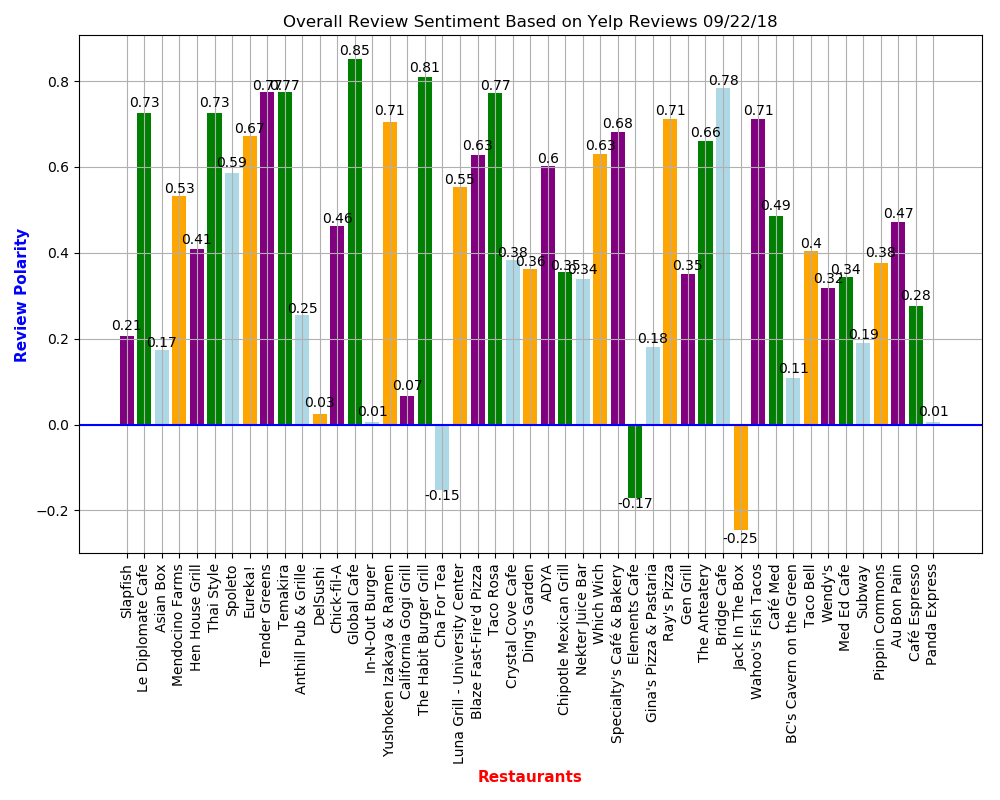

In [49]:
#define chart values
x_axis = vs_xaxis
y_axis = vs_yaxis
chartname = "Overall Review Sentiment Based on Yelp Reviews " + title_date
imagename = "overall_review_sentiment_yelp.png"
x_title = "Restaurants"
y_title = "Review Polarity"
x_label_color = "red"
y_label_color = "blue"
label_rotation = "vertical"
font_family = "sans-serif"
font_size = "11"
fig_h = 10
fig_l = 8
#barcolors ---use defaults

makebar(x_axis,y_axis,chartname,imagename,x_title,y_title
        ,x_label_color,y_label_color
        ,label_rotation,font_family,font_size,fig_h,fig_l)



---
### Restaurants Review By Distance



In [52]:
#copy the restaurant df as not to alter it later
rest_values_df = restaurant_df.copy()
rest_values_df.head(3)


,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,0,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,630,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
1,1,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839279,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
2,2,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,286,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612


In [54]:
# Value $ DataFrame
value_1 = rest_values_df[rest_values_df['price value'] == 1]
#value_1

# Value $$ Dataframe
value_2 = restaurant_df[restaurant_df['price value'] == 2]
#value_2

# Value $$$ DataFrame
value_3 = restaurant_df[restaurant_df['price value'] == 3]
value_3

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip


<IPython.core.display.Javascript object>


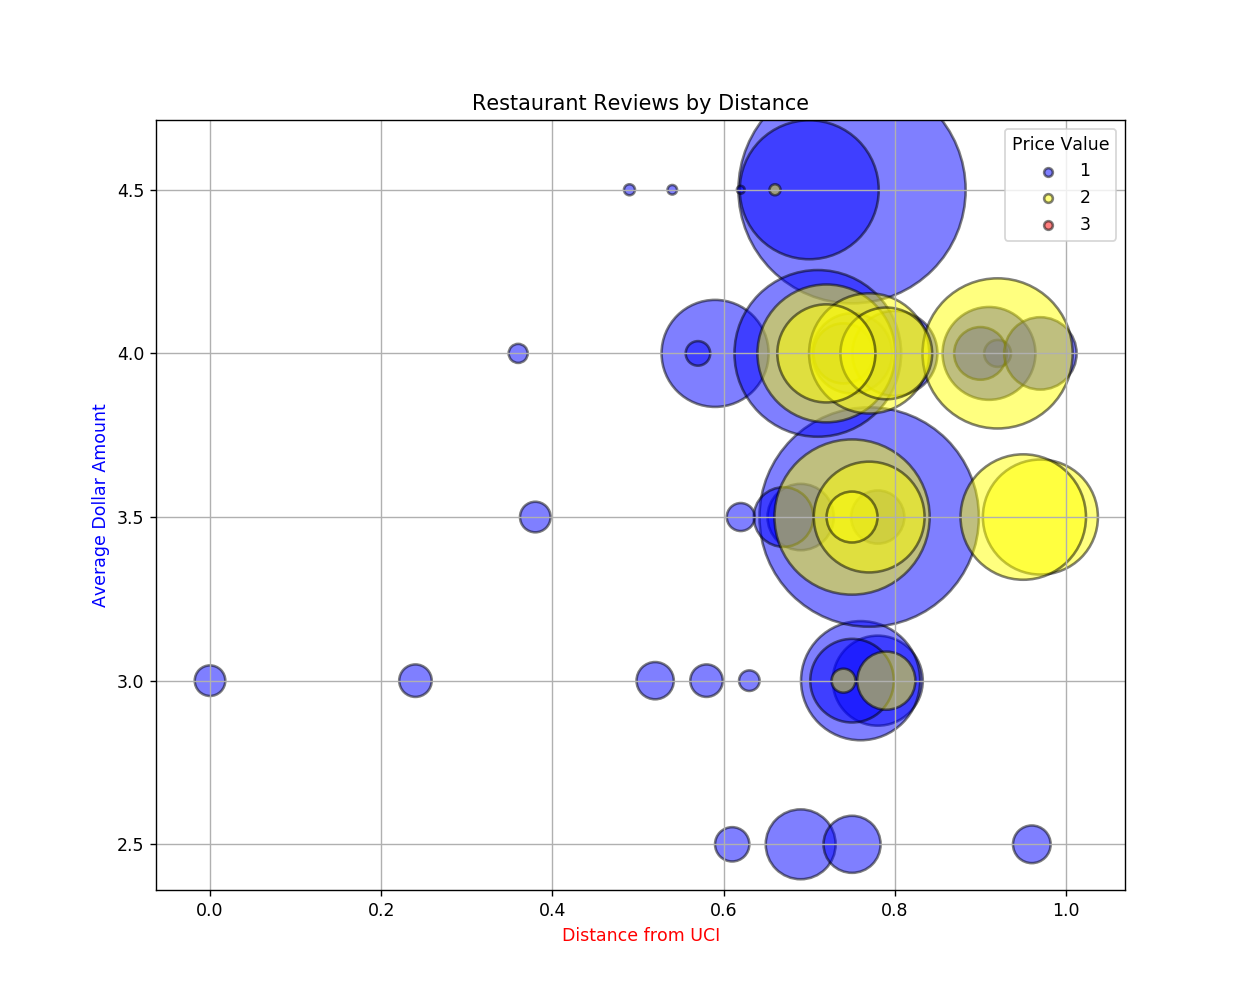

In [87]:
#reviews by distance rbd
rbd_distance1 = value_1["distance miles"]
rbd_distance2 = value_2["distance miles"]
rbd_distance3 = value_3["distance miles"]

rbd_review_1 = value_1["review rating"]
rbd_review_2 = value_2["review rating"]
rbd_review_3 = value_3["review rating"]

rbd_count1 = value_1["review count"]
rbd_count2 = value_2["review count"]
rbd_count3 = value_3["review count"]


rbd_xlabel = 'Distance from UCI'
rbd_ylabel = 'Average Dollar Amount'
rbd_map_title = 'Restaurant Reviews by Distance'
rbd_legend_title = 'Price Value'
rbd_imagename = "rating_by_distance"


#rbd_data = []
#rbd_results = {"distance":rbd_distance1,"rating":rbd_review_1,"count":rbd_count1}
#rbd_data.append(rbd_results)
#rbd_results = {"distance":rbd_distance2,"rating":rbd_review_2,"count":rbd_count2}
#rbd_data.append(rbd_results)
#rbd_results = {"distance":rbd_distance3,"rating":rbd_review_3,"count":rbd_count3}
#rbd_data.append(rbd_results)


#use function derived from jb logic 
scatterbyvalue(rbd_distance1, rbd_review_1, rbd_count1
               ,rbd_distance2, rbd_review_2, rbd_count2
               ,rbd_distance3, rbd_review_3, rbd_count3
               ,rbd_xlabel, rbd_ylabel,rbd_map_title,rbd_legend_title,rbd_imagename)





## GOOGLE Maps Restaurant locations relative to UCI

In [60]:
#verify the dataframe we are working with
restaurant_df.head(3)

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,0,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,630,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
1,1,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839279,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
2,2,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,286,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612


In [61]:
print(restaurant_df.columns)


Index(['index', 'yelpid', 'name', 'lat', 'lng', 'distance miles',
       'distance meters', 'price rating', 'price value', 'review count',
       'review rating', 'type', 'sub type', 'address1', 'city', 'state',
       'zip'],
      dtype='object')


In [63]:
#setup the marker locations for the google maps push pins
base_markers = []
for index, row in restaurant_df.iterrows():
    #print(f'{row[3]}, {row[4]}')
    bmarker = (row[3], row[4])
    base_markers.append(bmarker) 
    

In [69]:
#ulat = uci_address_df['lat']
#ulng = uci_address_df['lng']
#uname = uci_address_df['Location Name']
#uaddress = uci_address_df['Address']

#33.640495,-117.844296
uci_coordinates = (33.640495,-117.844296)
#uci_coordinates = (ulat, ulng)
#uci_coordinates
#basefig = gmaps.figure(center=uci_coordinates, zoom_level=12)


In [67]:
#check type of var
print(type(base_markers))

<class 'list'>


##### Display a map with locations within 1 mile of UCI

In [73]:
figure_layout = {
    'width': '600px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px'
}
fig = gmaps.figure(center=uci_coordinates, zoom_level=15,layout=figure_layout,map_type='HYBRID')
markers = gmaps.marker_layer(base_markers)
fig.add_layer(markers)


local_rest_locations = [
    {'name': 'UCI, University of California Irvine', 'location': (33.640495,-117.844296), 'higher_education': 1}
]

restaurant_locations = [business['location'] for business in local_rest_locations]
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>University</dt><dd>{higher_education}</dd>
</dl>
"""
business_info = [info_box_template.format(**business) for business in local_rest_locations]

marker_layer = gmaps.marker_layer(restaurant_locations, info_box_content=business_info)
fig.add_layer(marker_layer)


fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', padding='1px', width='600px'))

---
### Show a Traffic terrain heatmap of relative distance

In [71]:
figure_layout = {
    'width': '500px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px'
}
fig = gmaps.figure(center=uci_coordinates, zoom_level=14,layout=figure_layout)
markers = gmaps.heatmap_layer(base_markers)
fig.add_layer(gmaps.traffic_layer())
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', padding='1px', width='500px'))

---
### Show a satellite heatmap of relative distance

In [72]:
figure_layout = {
    'width': '500px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px'
}
fig = gmaps.figure(center=uci_coordinates, zoom_level=14,layout=figure_layout,map_type='HYBRID')
markers = gmaps.heatmap_layer(base_markers)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', padding='1px', width='500px'))

###### Locations within 1 mile of UCI
![01-Terrain_Map.png](images/map1.png)


###### Traffic terrain heatmap of relative distance
![02-Terrain_Map.png](images/map2.png)


###### Satellite heatmap of relative distance
![03-Terrain_Map.png](images/map3.png)


In [74]:
rest_values_df.head(3)

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,0,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,630,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
1,1,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839279,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
2,2,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,286,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612


---
##### Top 10 Reviewed Restaurants

In [187]:
#create a top 25 by review dataframe
reviews10_df = restaurant_df.copy()
reviews10_df.head(3)

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,0,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,630,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
1,1,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839279,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
2,2,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,286,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612


In [188]:
#reviews10_df = None

In [189]:
#deal with indexing issues, drop, recreate and reset

reviews10_df = reviews10_df.sort_values(["review count"], ascending=[0])
reviews10_df = reviews10_df.head(10)

del reviews10_df["index"]

reviews10_df = reviews10_df.reset_index()

del reviews10_df["index"]
reviews10_df.head(2)

,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839279,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
1,S445_-W9AwZO52M28Y78tA,Cha For Tea,33.650665,-117.838943,0.77,1234,$,1,1597,3.5,Bubble Tea,Cafes,4187 Campus Dr,Irvine,CA,92612


In [190]:
rbr_names = reviews10_df["name"].values
rbr_reviews = reviews10_df["review count"].values

print(rbr_names)
print(rbr_reviews)

['Le Diplomate Cafe' 'Cha For Tea' "Blaze Fast-Fire'd Pizza" 'Eureka!'
 'Hen House Grill' 'In-N-Out Burger' 'Slapfish' "Gina's Pizza & Pastaria"
 'Mendocino Farms' 'California Gogi Grill']
[1713 1597  922  799  748  641  630  522  479  471]


In [191]:
#view some stats on the review counts
print(rbr_reviews.max())
print(rbr_reviews.min())
print(rbr_reviews.mean())
#restaurant_df = restaurant_df.loc[restaurant_df["distance miles"]<=1]

1713
471
852.2


<IPython.core.display.Javascript object>


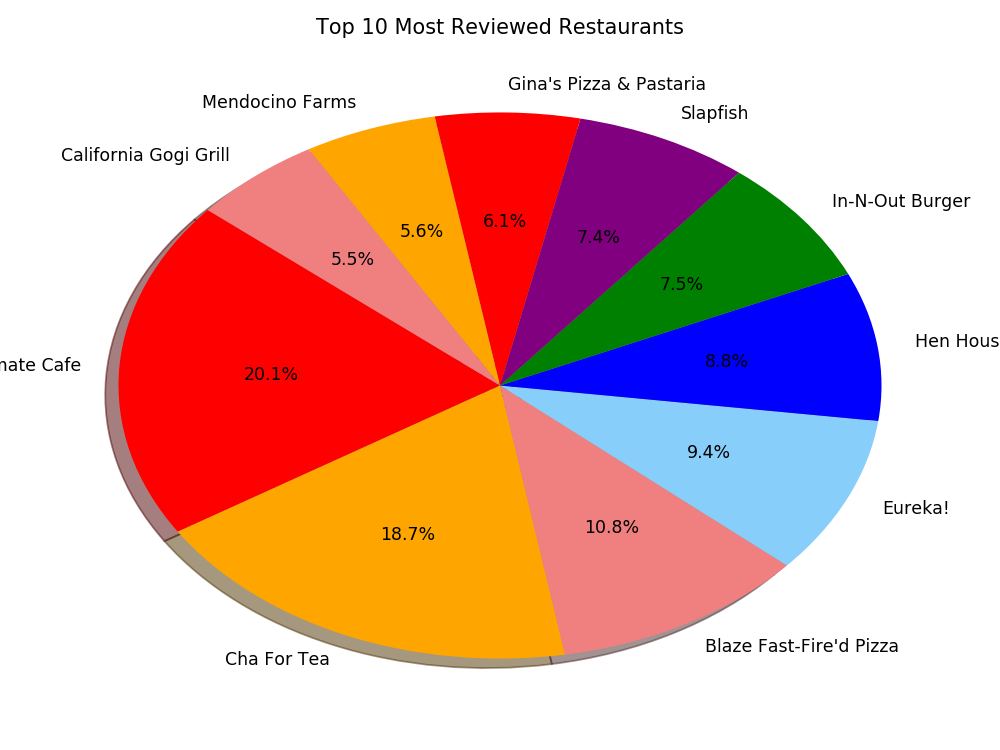

In [202]:
# Labels for the sections of our pie chart
# rbr_names

# The values of each section of the pie chart
# rbr_reviews

# The colors of each section of the pie chart
rbr_colors = ["red", "orange", "lightcoral", "lightskyblue","blue","green","purple"]

#set the size
plt.figure(figsize=(8,6))
plt.pie(rbr_reviews, labels=rbr_names, colors=rbr_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Top 10 Most Reviewed Restaurants")
plt.tight_layout()

#save the plot
plt.savefig("images/" + "top_10_most_reviewed.png")
plt.show()

---
##### Overall sentiment based off distance

<IPython.core.display.Javascript object>


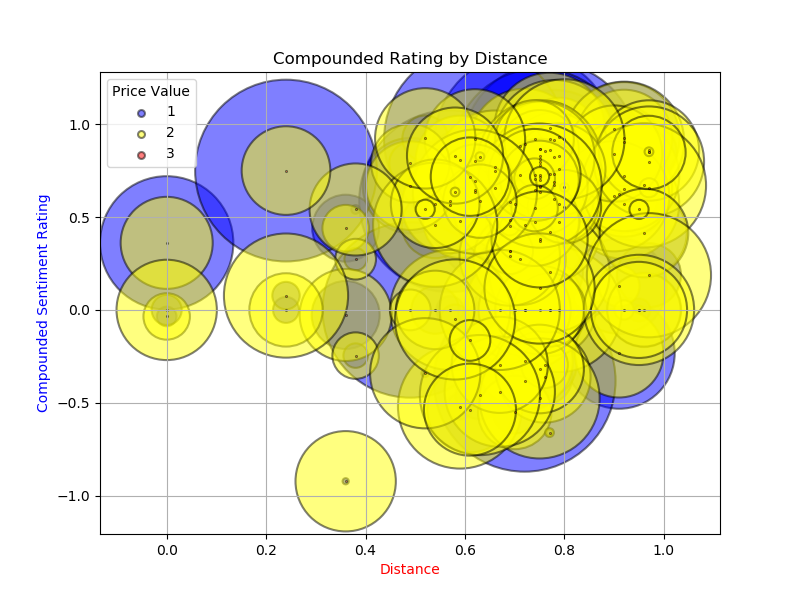

In [214]:
#overall sentiment based off distance, this will show if restraunts closer/further
#will have a more negative or positive sentiment value.


#reviews by distance
sen_distance_1 = reviews_merged_df["distance miles"]
sen_distance_2 = reviews_merged_df["distance miles"]
sen_distance_3 = reviews_merged_df["distance miles"]

#compound score
sen_compound_1 = reviews_merged_df["compound"]
sen_compound_2 = reviews_merged_df["compound"]
sen_compound_3 = reviews_merged_df["compound"]

sen_count1 = value_1["review count"]
sen_count2 = value_2["review count"]
sen_count3 = value_3["review count"]

sen_xlabel = 'Distance'
sen_ylabel = 'Compounded Sentiment Rating'
sen_map_title = 'Compounded Rating by Distance'
sen_imagename = "Compound_By_Distance"
font_family = "sans-serif"
font_size = "11"
sen_legend_title = 'Price Value'

#plt.barh(value_1["distance miles"], vs_yaxis["Compound Score"], align=center, alpha=0.5)
#plt.yticks(value_1["distance miles"], name)
#plt.xlabel('Miles Away')
#plt.title('Sentiment Distance')

#use function derived from jb logic
scatterbyvalue(sen_distance_1, sen_compound_1, sen_count1
              ,sen_distance_2, sen_compound_2, sen_count2
              ,sen_distance_3, sen_compound_3, sen_count3
              ,sen_xlabel, sen_ylabel,sen_map_title,sen_legend_title,sen_imagename)


---
##### Top 10 Rated Restaurants by sorted by distance

In [210]:
#restaurant_df

In [211]:

#Fields to extract - review rating, type
#rating_data = restaurant_data[["name", "review rating"]]
#rating_data
#result = df.sort(['A', 'B'], ascending=[1, 0])
#typrate_sorted = restaurant_data.sort_values(["review rating", "type"],ascending=False)

top_rated = restaurant_df.copy()
top_rated = top_rated.sort_values(["review rating"],ascending=False)
top_rated= top_rated.head(10)
top_rated

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
14,14,esUqa0VrYZoKlAr0RpFtYQ,In-N-Out Burger,33.650154,-117.840630,0.70,1126,$,1,641,4.5,Burgers,Fast Food,4115 Campus Dr,Irvine,CA,92612
1,1,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839279,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
5,5,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,Thai,Food Stands,5171 California Ave,Irvine,CA,92617
41,43,UiFrBo6P7ZNtQiccUMsFRQ,Med Ed Cafe,33.642078,-117.851237,0.54,869,$,1,3,4.5,Cafes,n/a,836 Health Sciences Rd,Irvine,CA,92697
37,39,qxI7VvvxTFuBGmPlv0C6DQ,Café Med,33.646480,-117.848900,0.49,791,$,1,4,4.5,Restaurants,n/a,Bldg 800 Academy Way,Irvine,CA,92697
34,36,61nCoxInTSrC8XGN_XWKXA,Bridge Cafe,33.644908,-117.834883,0.62,1000,$,1,2,4.5,Cafes,Coffee & Tea,510 East Peltason Dr,Irvine,CA,92617
0,0,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,630,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
22,22,3xTbXKlqf3luiSHdwr4qBw,Crystal Cove Cafe,33.639612,-117.852479,0.57,919,$,1,20,4.0,American (Traditional),Sandwiches,5221 California Ave,Irvine,CA,92617
28,29,2klb5ttoSEb2wNDT92dx9g,Specialty's Café & Bakery,33.646879,-117.854654,0.74,1192,$,1,120,4.0,Bakeries,Cafes,100 Innovation Dr,Irvine,CA,92617
20,20,saKl29canx_KLrDf1YmBTA,Blaze Fast-Fire'd Pizza,33.649757,-117.839082,0.71,1137,$,1,922,4.0,Pizza,Salad,4255 Campus Dr,Irvine,CA,92612


<IPython.core.display.Javascript object>


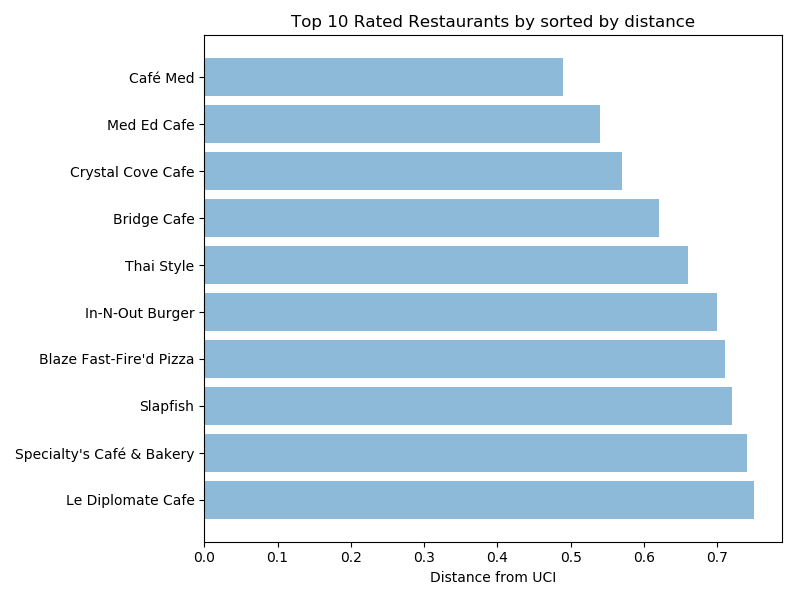

In [215]:

#Barplot prep
#top_rated.plot(kind='bar',x='name',y='distance miles')

top_rated_dist_srt = top_rated.sort_values('distance miles', ascending=False)
trd_miledist = top_rated_dist_srt["distance miles"].values
trd_name = top_rated_dist_srt["name"].values

trd_y_pos = np.arange(len(trd_name))

plt.figure(figsize=(8,6))
plt.barh(trd_y_pos, trd_miledist, align='center', alpha=0.5)
plt.yticks(trd_y_pos, trd_name)
plt.xlabel('Distance from UCI')
plt.title('Top 10 Rated Restaurants by sorted by distance')
plt.tight_layout()
plt.savefig("images/" + "top_10_restaurants_by_distance.png")
plt.show()